# Introduction to Machine Learning

-----

As a field, [machine learning][ml] is both expansive and mathematically complex. From deriving simple linear relationships via regression analysis to finding clusters of data points in an $N$-dimensional space, statistical and machine learning techniques can take years to fully master. Given the short time available in this course, however, we will take the simpler approach of demonstrating several commonly used approaches in order to both introduce the fundamental concepts in machine learning and the methodology we will use in Python to apply these concepts to actual data. For the latter, we will use the standard machine learning library in Python, which is the _scikit-learn_ module. This module is already included in our course JupyterHub server and can be included in a notebook by importing the _sklearn_ module.

In this notebook, we introduce the general concept of machine learning by first discussing the entire process of learning from data. Next, we introduce the scikit-learn, shortened to sklearn, module, which is the dominant Python module for machine learning (and one of the most popular machine learning libraries in existence). Using this module, we will demonstrate the four main tasks of machine learning: classification, regression, dimensional reduction, and clustering. Note that this notebook is simply an introduction to these topics, we will explore these and other areas in more detail throughout this course. Finally, we will discuss how to persist machine learning models.

-----
[ml]: https://en.wikipedia.org/wiki/Machine_learning


## Table of Contents

[Data Exploration](#Data-Exploration)

[Introducing Machine Learning](#Introducing-Machine-Learning)

[Introducing Scikit-Learn](#Introducing-Scikit-Learn)
- [Data Pre-Processing](#Data-Pre-Processing)
- [Data Scaling](#Data-Scaling)
- [Classification](#Classification)
- [Regression](#Regression)
- [Dimensional Reduction](#Dimensional-Reduction)
- [Clustering](#Clustering)

[Model Persistence](#Model-Persistence)

-----

Before proceeding with the _data exploration_ section of this Notebook, we first have our standard notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

[Back to TOC](#Table-of-Contents)

## Data Exploration

-----

The first steps in any data analytics effort, once the business goal has been defined, are to understand and prepare the data of interest. For example, the [**Cross Industry Standard Process for Data Mining**][wcdm] or (**CRISP-DM**) starts with the _Business Understanding_ step, immediately followed by the _Data Understanding_ and _Data Preparation_ steps. For machine learning analyses, these latter two steps require loading the data into our notebook, exploring the data either systematically or in a cumulative sense to understand the typical features for different instances. We also can generate descriptive statistical summaries and visualizations, such as a _pair plot_, to understand the data in full. Finally, we will need to clean the data to properly account for missing data, data that are incomplete or formatted incorrectly, or to generate meta-features (such as a date-time) from existing features.

For this notebook, we will focus on a single, simple data set, the standard [_Iris_ dataset][id], which is included by default with the Seaborn library (note this same data set is also included with scikit-learn). Note that given a data set, such as the _Iris_ data, we have rows, which correspond to different instances (e.g., different flowers), and columns, which correspond to different features of the instances (e.g., different measurements of the flowers). To understand the data, we first load this data into our notebook, before looking at several instances from the data. Next, we will group the data by species to explore cumulative quantities, before extracting a statistical summary of the entire data set. Finally, we will generate a pair plot to visually explore these data. Since this data has already been cleaned (and only consists of four features) we will not need to perform additional tasks.

-----
[id]: https://en.wikipedia.org/wiki/Iris_flower_data_set
[wcdm]: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining



In [2]:
# Load the Iris Data
iris = sns.load_dataset("iris")

-----

The data set consists of 150 total measurements of three different types of Iris flowers, equally divided between three classes: Iris setosa, Iris versicolor, and Iris virginica. Before proceeding, we can examine the Pandas DataFrame that contains these data to view typical  instances, to see a cumulative summary, and a brief statistical summary.

-----

In [3]:
# Examine several random rows
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
28,5.2,3.4,1.4,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
0,5.1,3.5,1.4,0.2,setosa


In [4]:
# Examine grouped data
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [5]:
# Get descriptive statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-----


As demonstrated by the output from the previous code cells, our test data matches our expectations (note that the full Iris data set is listed on [Wikipedia][wi]). These data consist of three types, each with fifty instances, and every row has four measured features (i.e., attributes). The four primary features of the data are _Sepal Length_, _Sepal Width_, _Petal Length_, and _Petal Width_. In simple terms, petals are the showy, colorful part of the Iris flower, while the sepals provide protection and support for the petals.

In addition, our cursory exploration of the DataFrame indicated the data are clean. One simple way to verify this is that the _count_ is the same for every feature, and the descriptive statistics (e.g., _min_, _max_, and _mean_) are all numerical. If we had missing or bad data in our DataFrame, these measures would generally indicate the problem. If there were missing data, we could drop any instance with missing data by using the `dropna` method, or alternatively insert a value by using the `fillna` method. An alternative, and powerful, technique for handling missing data is known as **imputing**, where we apply machine learning to generate _realistic_ values for any missing data. This approach will be demonstrated in a subsequent notebook.

At this point, we have loaded our data, and verified the data are clean. The next step is to visualize the relationships between the different features in our data.

-----

[wi]: https://en.wikipedia.org/wiki/Iris_flower_data_set

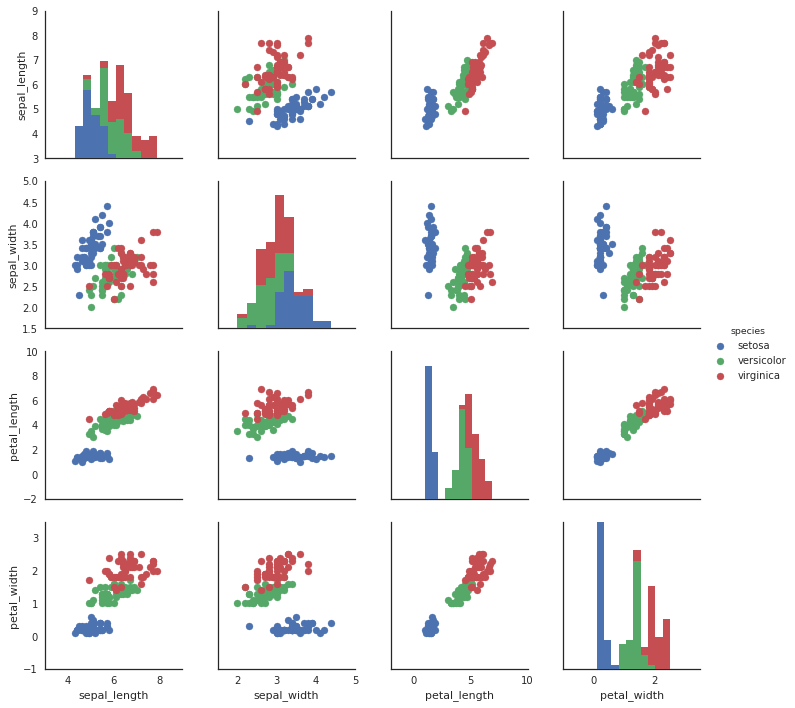

In [6]:
# Make pair plot, with histograms down the digonal, 
#and scatter plots off diagonal.
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Lets explicitly set the axes limits
axes = g.axes

lim = [(3, 9), (1.5, 5), (-2, 10), (-1, 3.5)]

for i in range(len(lim)):
    for j in range(len(lim)):
        axes[i, j].set_xlim(lim[j])
        axes[i, j].set_ylim(lim[i])

-----

These figures indicate that the three Iris species cluster naturally in these dimensions, with minimal overlap. As a result, these data provide an excellent test for different machine learning algorithms. Since the sklearn module works directly on NumPy arrays and not on a Pandas DataFrame, our next step is to build explicit _data_ and _label_ NumPy arrays. One caveat to this process is that the sklearn module expects two dimensional matrices (or arrays). Thus, if we have a vector (or one-dimensional array) for our data features or labels, we must explicitly convert this to a two-dimensional matrix, which involves a call to the NumPy `reshape` method.

In this particular case, we can easily grab the underlying NumPy two-dimensional array from a DataFrame by using the `values` attribute to select all four features. Next, we create a numerical array for the data types, where 0, 1, and 2 are mapped distinctly into _setosa_, _versicolor_, and _virginica_. This encoded label simplifies the classification process, since the machine learning algorithms natively operate on numbers and not string labels.

-----

In [14]:
# Extract the features for all instances and define instance labels
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])
label_names = ['Setosa', 'Versicolor', 'Virginica']

-----

With these new data structures, we can begin to apply machine learning algorithms from the scikit-learn module. First, however, we will generate one scatter plot that displays a larger version of the _Sepal Width_ versus _Petal Width_ scatter plot to highlight the inherent structure in these data. Furthermore, we will refer back to this plot in later analyses in this Notebook.

-----

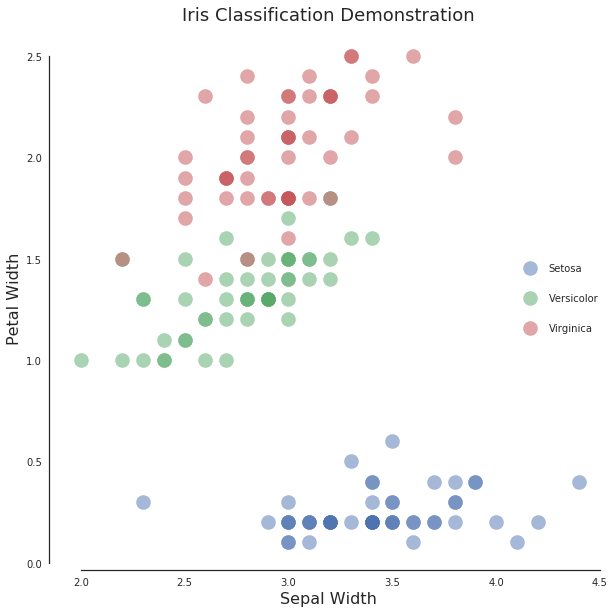

In [8]:
from matplotlib import cm

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10, 10))
        
x = data[:, 1]
y = data[:, 3]
        
for idx in np.unique(labels):
    # Convert index into an int
    i = int(idx)
    ax.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}',
               s=200, alpha = .5, cmap=cm.coolwarm) 

# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Classification Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

-----

As the above plot clearly shows, the _setosa_ type (Class 0, or blue dots) is already separated in these two dimensions, and the other two types: _versicolor_ and _virginica_, are nearly separated. This will simplify the task of running and evaluating the machine learning algorithms in the rest of this Notebook. However, this will not always be the case with arbitrary, real-world data. 

One other aspect to notice in the above plot is the variation in transparency (or darkness) of the different points. The data shown in this plot occasionally have instances with identical features. Thus, some points actually represent multiple instances, which visually results in a more opaque (or darker) point.

-----

[Back to TOC](#Table-of-Contents)

## Introducing Machine Learning

-----

Machine learning algorithms can be classified by the method in which they are constructed. [Supervised learning][sl] methods use training data to build a model, which is subsequently applied to additional data. On the other hand, [unsupervised learning][ul] methods seek relationships among data points that can be leveraged to construct a model that is subsequently applied to the data of interest. In some cases, training data are used to validate the effectiveness of an unsupervised method, or perhaps to provide some level of supervision, which is known as [semi-supervised learning][ssl].

More recently, additional types of learning have been developed. First, [transfer learning][wtl] extends a model trained on a previous data set to new, related data. This can be viewed as learning by analogy, which is similar to how humans learn. Second, [reinforcement learning][wrl] is a technique that explores how agents should behave within an environment by maximizing a cumulative reward. Finally, [deep learning][wdl] applies artificial neural networks that have multiple hidden layers to complex tasks, often with spectacular success in areas from image recognition to natural language processing.

-----

Broadly speaking, the application of a machine learning algorithm will be one of four different categories:

1. [Classification][cla] generates a model that predicts discrete categories for new, unseen data.

2. [Regression][re] generates a model that predicts continuous values for new, unseen data.

3. [Dimensionality reduction][dr] identifies (and optionally ranks) the most important (potentially new) features (or dimensions) for a data set.

4. [Clustering][clu] identifies clusters of instances in an $N$-dimensional feature space.

These categories are visually illustrated in the following graphic from the scikit-learn website (&copy; 2007-2017, scikit-learn developers / BSD License), along with a decision flowchart providing guidance on what methods to apply for a particular problem.

![SKLEARN Image](http://scikit-learn.org/stable/_static/ml_map.png)


-----

One final point to clarify before proceeding with demonstrations of these different algorithm categories. When applying a machine learning algorithm to a problem, we often need to specify both model parameters and model hyperparameters. While they are similar, the difference between these two types of information depends on whether the value can be estimated from the data.
  
<dl>
<dt>Parameter</dt>
<dd>A value that can be estimated from the data being analyzed and that is internal to the machine learning algorithm. A parameter is generally not specified by the programmer, and instead is determined automatically by the algorithm implementation (e.g., directly in the scikit-learn library). For example, the coefficients in a linear regression model are machine learning parameters.</dd>
  
<dt>[Hyperparameter][whp]</dt>
<dd>A value that cannot be estimated from the data being analyzed and that is external to a specific machine learning algorithm. A hyperparameter is generally specified by the programmer prior to the start of the learning process. As a result, the hyperparameter directly influences the performance of the algorithm and thus is a tunable parameter. For example, the number of neighbors in a k-nearest neighbors implementation is a hyperparameter.</dd>

</dl>

-----

[cla]: https://en.wikipedia.org/wiki/Statistical_classification
[re]: https://en.wikipedia.org/wiki/Regression_analysis
[dr]: https://en.wikipedia.org/wiki/Dimensionality_reduction
[clu]: https://en.wikipedia.org/wiki/Cluster_analysis
[sl]: https://en.wikipedia.org/wiki/Supervised_learning
[ul]: https://en.wikipedia.org/wiki/Unsupervised_learning
[ssl]: https://en.wikipedia.org/wiki/Semi-supervised_learning
[wtl]: https://en.wikipedia.org/wiki/Transfer_learning
[wrl]: https://en.wikipedia.org/wiki/Reinforcement_learning#Current_research
[wdl]: https://en.wikipedia.org/wiki/Deep_learning
[whp]: https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)


[Back to TOC](#Table-of-Contents)

## Introducing Scikit-Learn

-----

The scikit-learn module is a powerful, yet simple to use machine learning library written in the Python programming language. The general approach to using this library in a data analytics script is to follow a basic script:

1. Given the application type: classification, regression, dimensional reduction, or clustering, create the appropriate scikit-learn estimator.
2. Determine the best _hyper-parameters_ for the machine learning application (e.g., number of neighbors for the k-nearest neighbors algorithm).
3. Extract the feature matrix (our _data_ array), and if appropriate, the target vector (our _labels_ array).
4. Apply the `fit` method for the selected estimator to generate a best fit model.
5. Apply the generated  model to new data by calling the:
 - `predict` method for classification and regression applications,
 - `transform` method for dimensional reduction applications, and
 - either `predict` or `transform` for clustering applications, depending on whether data are being assigned to clusters (`predict`) or the data are being converted so that the distances from each data point to each cluster center are computed (`transform`).
6. Finally, as appropriate, the efficacy of the machine learning algorithm can be computed for test data by calling an appropriate `score` method (and other available performance metrics).

The rest of this notebook demonstrates this basic script for each of the four application types: classification, regression, dimensional reduction, and clustering, before demonstrating how to save and load scikit-learn machine learning models. First, however, we will demonstrate several important data pre-processing that generally occurs before the application of a scikit-learn machine learning algorithm. The first pre-processing step is the separation of the data into training and testing samples, and the second pre-processing step is the scaling (or normalization) of the features.

-----

### Data Pre-Processing

Before we can apply a machine learning algorithm to the data of interest, we must divide the data into training and testing data sets. The _training_ data are used to generate the supervised model, while the _testing_ data are used to quantify the quality of the generated model. In the scikit-learn library, we can do this by using the `train_test_split` method in the `model_selection` module. 

The only tuning parameter at this point is the `test_size` parameter, which we have set to $0.4$ via the `test_size` variable. This means that 40% of our data will be reserved for testing and 60% will be used to generate the model. By changing this value, we can explore how different algorithms perform with more or less training data. One last parameter this method takes is the `random_state`  parameter, which initializes the random sequence used to determine the split into the testing and training data. By using the same value, we ensure reproducibility. Varying this parameter will generate different testing and training data, even with the same value for the `test_size` parameter.

-----

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
# Note that we have both 'data' and 'labels'
d_train, d_test, l_train, l_test \
    = train_test_split(data, labels, test_size=0.4, random_state=23)

### Data Scaling

Many machine learning estimators in the scikit-learn library are sensitive to variations in the spread of features within a data set. For example, if all features but one span similar ranges (e.g., zero through one) and one feature spans a much larger range (e.g., zero through one hundred), an algorithm might focus on the one feature with a larger spread, even if this produces a sub-optimal result. To prevent this, we generally scale the features to improve the performance of a given scikit-learn estimator.

Data scaling in scikit-learn can take several forms:
- [**Standardization**][sls]: the data are scaled to have zero mean and unit (i.e., one) variance.
- [**Normalization**][sln]: the data are scaled to have unit mean and variance.
- [**Range**][slr]: the data are scaled to span a defined range, such as $[0, 1]$.
- [**Binarization**][slb]: the data are thresholded such that values below the threshold are zero (or False), and above the threshold are one (or True).

One important caveat to scaling is that any scaling technique should be _trained_ via the `fit` method on the training data used for the machine learning algorithm. Once trained, the scaling technique can be applied equally to the training and testing data. In this manner, the testing data will always match the space spanned by the training data, which is what is used to generate the predictive model.

We demonstrate this approach in the following code cell, where we compute a standardization from our training data. This transformation is applied to both the training and testing data. The transformation is displayed in the `for` loop, which iterates through the original and transformed data. The second code block computes and displays the array minimum and maximum values for the scaled training data.

-----
[sls]: http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
[sln]: http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
[slr]: http://scikit-learn.org/stable/modules/preprocessing.html#normalization
[slb]: http://scikit-learn.org/stable/modules/preprocessing.html#binarization

In [18]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler
sc = StandardScaler().fit(d_train)

d_train_sc = sc.transform(d_train)
d_test_sc = sc.transform(d_test)

for val, val_sc in zip(d_train[:10], d_train_sc[:10]):
    print(val, val_sc)

[ 6.7  3.   5.   1.7] [ 1.14223232 -0.02334012  0.71995791  0.65054316]
[ 4.7  3.2  1.6  0.2] [-1.40234464  0.44346228 -1.23485239 -1.34544153]
[ 5.8  2.6  4.   1.2] [-0.00282731 -0.95694493  0.14501371 -0.01478507]
[ 5.1  3.3  1.7  0.5] [-0.89342924  0.67686349 -1.17735797 -0.94624459]
[ 6.4  2.8  5.6  2.1] [ 0.76054578 -0.49014253  1.06492443  1.18280574]
[ 5.5  2.3  4.   1.3] [-0.38451385 -1.65714854  0.14501371  0.11828057]
[ 6.8  2.8  4.8  1.4] [ 1.26946117 -0.49014253  0.60496907  0.25134622]
[ 6.4  2.8  5.6  2.2] [ 0.76054578 -0.49014253  1.06492443  1.31587139]
[ 5.8  2.8  5.1  2.4] [-0.00282731 -0.49014253  0.77745233  1.58200268]
[ 6.3  2.5  4.9  1.5] [ 0.63331693 -1.19034613  0.66246349  0.38441187]


In [19]:
# Print out the min and max for each column in the array
print(np.amin(d_train_sc, axis=0))
print(np.amax(d_train_sc, axis=0))

[-1.91126003 -2.35735214 -1.57981891 -1.47850718]
[ 2.4145208   3.24427671  1.8123519   1.71506833]


-----

With our data properly divided into training and testing samples, and the features appropriately scaled, we now change to the application of machine learning algorithms by using the appropriate estimator from the scikit-learn library.

-----

### Classification

The first type of algorithm we will demonstrate is classification, where we train an estimator to generate a model for the prediction of discrete labels. The following code cell completes this task by performing [k-Nearest Neighbors][knn] classification by using scikit-learn. In this example, we use five nearest neighbors (but this value can be easily adjusted to see how the classification performance changes). As demonstrated in this code example, the standard classification process in scikit-learn is to first fit a model to the training data and to subsequently apply this model to predict values for the testing data. We can compute an accuracy measurement for our trained algorithm by using the `score` method to compare the _predicted_ and _known_ labels for the testing data.

-----

[knn]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [20]:
# First, lets try k-nearest neighbors (KNN)
from sklearn import neighbors

# The number of neighbors affects performance
nbrs = 5

# First we construct our model
knn = neighbors.KNeighborsClassifier(n_neighbors=nbrs)

# Now train our model
knn.fit(d_train_sc, l_train)

# Compute and display accuracy score
score = 100.0 * knn.score(d_test_sc, l_test)
print(f"KNN ({nbrs} neighbors) prediction accuracy = {score:5.1f}%")

KNN (5 neighbors) prediction accuracy =  96.7%


-----

### Regression

The second machine learning application we will demonstrate is regression. To demonstrate regression, we will introduce the [Decision Tree][dt]. A decision tree simply asks a set of questions of the data, and based on the answers, constructs a model representation. The tree (or model) is constructed by recursively splitting a data set into new groupings based on a statistical measure of the data along each different dimension (popular measures include the Gini coefficient or the entropy).

The terminal nodes in the tree are known as leaf nodes, and they provide the final predictions. In the simplest form, the leaf node simply provides the final prediction. More realistic decision trees generate a model prediction by using all instances in the leaf node, for example by averaging across them.

Before generating a regression model, however, we must pre-process our data to identify our independent variables (or features) and our dependent variable (or feature). Given a set of new independent variables, a regression model will predict the dependent variable. In the following code cell, we first select the first three features to be our independent variables and the fourth variable to be our dependent variable. We divide these into training and testing samples.


-----

[dt]: https://en.wikipedia.org/wiki/Decision_tree_learning

In [21]:
# Chunk out first three columns as our independent variables
# Last column becomes our dependent variable
ind_data = data[:,0:3]
dep_data = data[:,-1]

# This is the amount to hold out for 'blind' testing
frac = 0.4

d_train, d_test, r_train, r_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

-----

We can now create a decision tree regressor by using scikit-learn to create an estimator, fit the estimator to the training data, and finally, apply the model to the test data to make predictions. At the end of the following code cell, we also compute a performance score for the resulting model by comparing the predictions to the actual values for the testing data.

-----

In [25]:
# Next lets try Decision Trees
from sklearn import tree

# Construct the tree regressor
dtr = tree.DecisionTreeRegressor()

# Fit the regressor to the training data
dtr.fit(d_train, r_train)

# Compute and display score from test data
score = 100.0 * dtr.score(d_test, r_test)
print(f'DT regression accuracy = {score:5.1f}%')

DT regression accuracy =  91.3%


-----

### Dimensionality Reduction

When confronted with a large, multi-dimensional data set, one approach to simplify any subsequent analysis is to reduce the number of dimensions (or features) that must be processed. In some cases, features can be removed from an analysis based on business logic, or the features that contain the most information can be quantified somehow. More generally, however, we can employ [dimensional reduction][dr], a machine learning technique that quantifies relationships between the original dimensions (or features, attributes, or columns of a DataFrame) to identify new dimensions that better capture the inherent relationships within the data.

The standard technique to perform this is known as [principal component analysis][pca], or PCA. Mathematically, we can derive PCA by using linear algebra to solve a set of linear equations. This process effectively rotates the data into a new set of dimensions, and by ranking the importance of the new dimensions, we can optimally select fewer dimensions for use in other machine learning algorithms. 

We can easily implement PCA by using scikit-learn. The _PCA_ estimator requires one tunable hyper-parameter that specifies the target number of dimensions. This value can be arbitrarily selected, perhaps based on prior information, or it can be iteratively determined. After the model is created, we fit the model to the data and next create our new, rotated data set. This is demonstrated in the next code cell. 

-----

[dr]: https://en.wikipedia.org/wiki/Dimensionality_reduction
[pca]: https://en.wikipedia.org/wiki/Principal_component_analysis

In [26]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# First create our PCA model
# For now we assume two components, to make plotting easier.
pca = PCA(n_components=2)

# Fit model to the data
pca.fit(data)

# Compute the transformed data (rotation to PCA space)
data_reduced = pca.transform(data)

# Need to modify to match number of PCA components
cols = ['PCA1', 'PCA2', 'Species']

# Now create a new DataFrame to hold the results
# First a temporary np.array
tmp_d = np.concatenate((data_reduced,
                        iris['species'].values.reshape((150, 1))), axis=1)
iris_pca = pd.DataFrame(tmp_d, columns = cols)

for idx, evr in enumerate(pca.explained_variance_ratio_):
    print(f'Component {idx} explains {100.0* evr:4.2f} of the original variance.')

Component 0 explains 92.46 of the original variance.
Component 1 explains 5.31 of the original variance.


-----

At the end of the previous code cell, we measure the amount of the original variance (or spread) in the original data that is captured by each new dimension. As this example shows, these two new dimensions capture almost 98% of the variance in the original data. This means that any analysis that uses only these two new dimensions will closely represent the analysis if performed on the entire data.

Given the two new dimensions, we can also display how they are related to the original four dimensions (note that this isn't just a rotation, since we have actually reduced the number of dimensions).

-----

In [27]:
# We can print out transformation matrix

# Original Attribute Names
c_names = ['SL', 'SW', 'PL', 'PW']

# For each principal component, print out the tranformation equation
for row in pca.components_:
    print(r" + ".join("{0:6.3f} * {1:s}".format(val, name) 
                      for val, name in zip(row, c_names)))

 0.361 * SL + -0.085 * SW +  0.857 * PL +  0.358 * PW
 0.657 * SL +  0.730 * SW + -0.173 * PL + -0.075 * PW


-----

### Clustering

The last machine learning technique we will explore in this notebook is [cluster finding][cl]. In this introductory notebook, we will demonstrate one of the simplest clustering techniques, spatial clustering, which seeks to first find $N$ clusters in a data set and to subsequently identify to which cluster each instance (or data point) belongs. The specific algorithm we employ below is the [k-means algorithm][km], which is one of the simplest to understand. In this algorithm, we start with a guess for the number of clusters (again this can be based on prior information or iteratively quantified). We randomly place cluster centers in the data and determine how well the data _cluster_ to these cluster centers. This information is used to pick new cluster centers, and the process continues until a solution converges (or we reach a predefined number of iterations). 

We can employ k-means clustering with scikit-learn by using the `KMeans` estimator within the `cluster` module. This requires the number of clusters to find as a hyper-parameter. We also pass in the original, unscaled data since we will want the cluster centers in the original space spanned by our instances. After the model is created, we once again fit the model to the data and subsequently obtain our model predictions. We also specify a value for the `random_state` hyper-parameter to ensure reproducibility. Note how this process is unsupervised, in that we do not use the label array in this process. 

After we find our clusters, we plot the original data and the new cluster centers to visually quantify how well the algorithm performed.

-----
[cl]: https://en.wikipedia.org/wiki/Cluster_analysis
[km]: https://en.wikipedia.org/wiki/K-means_clustering

In [28]:
# We will use kmeans from scikit-learn
from sklearn.cluster import KMeans

# We build our model assuming three clusters
k_means = KMeans(n_clusters=3, random_state=23)

# We fit our data to assign classes
k_means.fit(data)

print(k_means.cluster_centers_)

[[ 5.006       3.428       1.462       0.246     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]


NameError: name 'x' is not defined

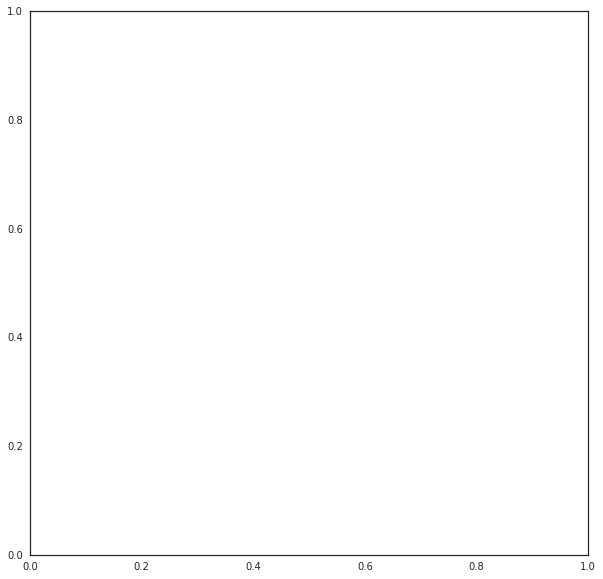

In [29]:
# Define cluster centers (SW vs PW)
xcc = k_means.cluster_centers_[:,1]
ycc = k_means.cluster_centers_[:,3]

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots(figsize=(10, 10))
      
for idx in np.unique(labels):
    # Convert index into an int
    i = int(idx)
    ax.scatter(x[labels == i], y[labels == i], label=f'{label_names[i]}',
               s=200, alpha = .5, cmap=cm.coolwarm) 

# Plot cluster centers
ax.scatter(xcc, ycc, marker='*', label='Cluster Centers', 
           s=500, alpha=0.75, cmap=cm.coolwarm)

# Decorate and clean plot
ax.set_xlabel('Sepal Width', fontsize=16)
ax.set_ylabel('Petal Width', fontsize=16)
ax.legend(loc = 7, labelspacing=2)
ax.set_title("Iris Cluster Demonstration", fontsize=18)
sns.despine(offset=0, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used the scikit-learn library to perform introductory machine learning. Make the following code changes in those code cells and execute the notebook again to answer the associated question.

2. Change the first `test-size` split from 0.4 to 0.25. How did the classification results change?
2. Change the first `test-size` split from 0.4 to 0.6. How did the classification results change?
3. Change the `n_neighbors` hyper-parameter in the k-nn estimator to three (and ten). How did the classification results change?
4. Change the `test-size` split from 0.4 to 0.25 in the regression example. How did the regression results change?
3. Change the `n_components` hyper-parameter in the PCA code example to three (and four). What are the new explained variances?
6. Change the `n_clusters` hyper-parameter in the cluster finding code example to two (and four). Where are the new cluster centers? Does this look better or worse?
7. Change the `random_state` parameter in any of the code cells. Do the results change? Why or why not?

-----
[Back to TOC](#Table-of-Contents)

## Model Persistence

----

As the previous code cells demonstrate, we can generate machine learning models rather easily for small data sets by using the scikit-learn library. For larger data sets, however, either in the number of instances, the number of features, or both, building a quality machine learning model can take considerable time and effort. As a result, we may wish to persist a trained machine learning model so that it can be applied to new data at a later time. The scikit-learn library supports [model persistence][slmp] by using either the standard Python _pickle_ approach to saving data, or the more robust [joblib][jp] approach, which efficiently scales to larger and more complex data.

This approach is demonstrated in the following code cells, where we first persist our k-nearest neighbor classification model to a file. Next, we demonstrate the existence of this file on the course server (this model file will be unique to each student) by using the Unix `ls` command. Third, we load the saved file and use the new model to make predictions, which match the predictions from our original model, demonstrating the viability of this persistence mechanism. Finally, we remove the saved model from the file system by using the Unix `rm` command.

----

[slmp]: http://scikit-learn.org/stable/modules/model_persistence.html
[jp]: https://pythonhosted.org/joblib/persistence.html

In [32]:
from sklearn.externals import joblib

filename = 'knn-model.pkl'
with open(filename, 'wb') as fout:
    joblib.dump(knn, fout)

In [33]:
# Display saved model
!ls -la $filename

-rw-r--r-- 1 data_scientist users 8894 Jan 17 16:33 knn-model.pkl


In [34]:
# Open model file and load model
with open(filename, 'rb') as fin:
    new_knn = joblib.load(fin)

# Compute and display accuracy score
score = 100.0 * new_knn.score(d_test_sc, l_test)
print(f"New KNN model ({nbrs} neighbors) prediction accuracy = {score:5.1f}%\n")

# Create and predict class for fake instance
sample_iris = [[6.2, 3.4, 2.3, 4.5]]
print(f'Prediction w/ old model = {knn.predict(sample_iris)[0]:d}')
print(f'Prediction w/ new model = {new_knn.predict(sample_iris)[0]:d}')

New KNN model (5 neighbors) prediction accuracy =  96.7%

Prediction w/ old model = 2
Prediction w/ new model = 2


In [35]:
# Delete saved model
!rm -rf $filename

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. The [scikit-learn tutorial][1] on the sciki-learn website.
2. A [tutorial presentation][2] on scikit learn from one of the main developers, Andres Mueller.
3. A [scikit-learn tutorial][3] by Karlijn Willems from datacamp.
4. An [overview of machine learning][4] excerpt from the _Python Data Science Handbook_ by Jake VanderPlas.
5. An [introduction to scikit-learn][5] excerpt from the _Python Data Science Handbook_ by Jake VanderPlas.

-----

[1]: http://scikit-learn.org/stable/tutorial/basic/tutorial.html
[2]: https://amueller.github.io/sklearn_tutorial/
[3]: https://www.datacamp.com/community/tutorials/machine-learning-python
[4]: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.01-What-Is-Machine-Learning.ipynb
[5]: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb